# We will use the book Think Stat 2 for our Statistics course. 
### This book provides a more practical approach to understand statistics (using Python use cases)
* https://greenteapress.com/wp/think-stats-2e/
* https://greenteapress.com/thinkstats2/thinkstats2.pdf

# A Statistical Approach to Data Analytics

# The organization of the book follows the process we use when we start working with a dataset:

**1. Importing and cleaning:** Whatever format the data is in, it usually takes some time and effort to read the data, clean and transform it, and check that everything made it through the translation process intact.

**2. Single variable explorations:** I usually start by examining one variable at a time, finding out what the variables mean, looking at distributions of the values, and choosing appropriate summary statistics.

**3. Pair-wise explorations:** To identify possible relationships between vari-ables, We look at tables and scatter plots, and compute correlations and linear fits.

**4. Multivariate analysis:** If there are apparent relationships between vari-ables, We use multiple regression to add control variables and investigate more complex relationships.

**5. Estimation and hypothesis testing:** When reporting statistical results, it is important to answer three questions: How big is the effect? How much variability should we expect if we run the same measurement again? Is it possible that the apparent effect is due to chance?

**6. Visualization:** During exploration, visualization is an important tool for finding possible relationships and effects. Then if an apparent effect holds up to scrutiny, visualization is an effective way to communicate results.

## This Notebook tries to answer the follwing question for a couple who is having their first baby
### Question: do first babies tend to arrive late? 

# Disadvantages of anecdotal evidence
* Small number of observations: If pregnancy length is longer for first babies, the difference is probably small compared to natural variation. In that case, we might have to compare a large number of pregnancies to be sure that a difference exists.

* Selection bias: People who join a discussion of this question might be interested because their first babies were late. In that case the process of selecting data would bias the results.

* Confirmation bias: People who believe the claim might be more likely to contribute examples that confirm it. People who doubt the claim are more likely to cite counterexamples.

* Inaccuracy: Anecdotes are often personal stories, and often misremem- bered, misrepresented, repeated inaccurately, etc.

#### So, how can we do better?
#### Ans - Using Statistical Approach

**1. Data collection:** We will use data from a large national survey that was designed explicitly with the goal of generating statistically valid inferences about the U.S. population.

**2. Descriptive statistics:** We will generate statistics that summarize the data concisely, and evaluate different ways to visualize data.

**3. Exploratory data analysis:** We will look for patterns, differences, and other features that address the questions we are interested in. At the same time we will check for inconsistencies and identify limitations.

**4. Estimation:**  We will use data from a sample to estimate characteristics of the general population.

**5. Hypothesis testing:** Where we see apparent effects, like a difference between two groups, we will evaluate whether the effect might have happened by chance.

In [220]:
import pandas as pd

In [515]:
import nsfg
df = nsfg.ReadFemPreg()
df

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,cmotpreg,prgoutcome,cmprgend,flgdkmo1,cmprgbeg,ageatend,hpageend,gestasun_m,gestasun_w,wksgest,mosgest,dk1gest,dk2gest,dk3gest,bpa_bdscheck1,bpa_bdscheck2,bpa_bdscheck3,babysex,birthwgt_lb,birthwgt_oz,lobthwgt,babysex2,birthwgt_lb2,birthwgt_oz2,lobthwgt2,babysex3,birthwgt_lb3,birthwgt_oz3,lobthwgt3,cmbabdob,kidage,hpagelb,birthplc,paybirth1,paybirth2,paybirth3,knewpreg,trimestr,ltrimest,priorsmk,postsmks,npostsmk,getprena,bgnprena,pnctrim,lpnctri,workpreg,workborn,didwork,matweeks,weeksdk,matleave,matchfound,livehere,alivenow,cmkidied,cmkidlft,lastage,wherenow,legagree,parenend,anynurse,fedsolid,frsteatd_n,frsteatd_p,frsteatd,quitnurs,ageqtnur_n,ageqtnur_p,ageqtnur,matchfound2,livehere2,alivenow2,cmkidied2,cmkidlft2,lastage2,wherenow2,legagree2,parenend2,anynurse2,fedsolid2,frsteatd_n2,frsteatd_p2,frsteatd2,quitnurs2,ageqtnur_n2,ageqtnur_p2,ageqtnur2,matchfound3,livehere3,alivenow3,cmkidied3,cmkidlft3,lastage3,wherenow3,legagree3,parenend3,anynurse3,fedsolid3,frsteatd_n3,frsteatd_p3,frsteatd3,quitnurs3,ageqtnur_n3,ageqtnur_p3,ageqtnur3,cmlastlb,cmfstprg,cmlstprg,cmintstr,cmintfin,cmintstrop,cmintfinop,cmintstrcr,cmintfincr,evuseint,stopduse,whystopd,whatmeth01,whatmeth02,whatmeth03,whatmeth04,resnouse,wantbold,probbabe,cnfrmno,wantbld2,timingok,toosoon_n,toosoon_p,wthpart1,wthpart2,feelinpg,hpwnold,timokhp,cohpbeg,cohpend,tellfath,whentell,tryscale,wantscal,whyprg1,whyprg2,whynouse1,whynouse2,whynouse3,anyusint,prglngth,outcome,birthord,datend,agepreg,datecon,agecon,fmarout5,pmarpreg,rmarout6,fmarcon5,learnprg,pncarewk,paydeliv,lbw1,bfeedwks,maternlv,oldwantr,oldwantp,wantresp,wantpart,cmbirth,ager,agescrn,fmarital,rmarital,educat,hieduc,race,hispanic,hisprace,rcurpreg,pregnum,parity,insuranc,pubassis,poverty,laborfor,religion,metro,brnout,yrstrus,prglngth_i,outcome_i,birthord_i,datend_i,agepreg_i,datecon_i,agecon_i,fmarout5_i,pmarpreg_i,rmarout6_i,fmarcon5_i,learnprg_i,pncarewk_i,paydeliv_i,lbw1_i,bfeedwks_i,maternlv_i,oldwantr_i,oldwantp_i,wantresp_i,wantpart_i,ager_i,fmarital_i,rmarital_i,educat_i,hieduc_i,race_i,hispanic_i,hisprace_i,rcurpreg_i,pregnum_i,parity_i,insuranc_i,pubassis_i,poverty_i,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,1.0,1093.0,NaN,1084.0,NaN,NaN,9.0,0.0,39.0,9.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0,8.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1093.0,138.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1166.0,1093.0,1166.0,920.0,1093.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,1.0,NaN,NaN,1,2.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,39,1,1.0,1093.0,33.16,1084,3241,1.0,2.0,1.0,1,NaN,NaN,NaN,2.0,995.0,NaN,1,2,1,2,695,44,44,1,1,16,12,2,2,2,2,2,2,2,2,469,3,2,1,5,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,1.0,1166.0,NaN,1157.0,NaN,NaN,9.0,0.0,39.0,9.0,NaN,NaN,NaN,0.0,NaN,NaN,2.0,7.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1166.0,65.0,42.0,1.0,1.0,2.0,NaN,2.0,NaN,NaN,0.0,5.0,NaN,1.0,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0,1.0,4.0,NaN,20.0,1.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1166.0,1093.0,1166.0,1093.0,1166.0,1166.0,1231.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,1.0,NaN,NaN,1,4.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,39,1,2.0,1166.0,39.25,1157,3850,1.0,2.0,1.0,1,2.0,4.0,3.0,2.0,87.0,0.0,1,4,1,4,695,44,44,1,1,16,12,2,2,2,2,2,2,

In [519]:
df = df.loc[:,['caseid','outcome','pregordr','birthord','birthwgt_lb','birthwgt_oz','agepreg','pregnum','prglngth']]

In [520]:
df

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
0,1,1,1,1.0,8.0,13.0,33.16,2,39
1,1,1,2,2.0,7.0,14.0,39.25,2,39
2,2,1,1,1.0,9.0,2.0,14.33,3,39
3,2,1,2,2.0,7.0,0.0,17.83,3,39
4,2,1,3,3.0,6.0,3.0,18.33,3,39
...,...,...,...,...,...,...,...,...,...
13588,12571,1,1,1.0,6.0,3.0,17.91,5,39
13589,12571,2,2,NaN,NaN,NaN,18.50,5,6
13590,12571,2,3,NaN,NaN,NaN,19.75,5,5
13591,12571,1,4,2.0,7.0,8.0,21.58,5,39


In [521]:
df

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
0,1,1,1,1.0,8.0,13.0,33.16,2,39
1,1,1,2,2.0,7.0,14.0,39.25,2,39
2,2,1,1,1.0,9.0,2.0,14.33,3,39
3,2,1,2,2.0,7.0,0.0,17.83,3,39
4,2,1,3,3.0,6.0,3.0,18.33,3,39
...,...,...,...,...,...,...,...,...,...
13588,12571,1,1,1.0,6.0,3.0,17.91,5,39
13589,12571,2,2,NaN,NaN,NaN,18.50,5,6
13590,12571,2,3,NaN,NaN,NaN,19.75,5,5
13591,12571,1,4,2.0,7.0,8.0,21.58,5,39


In [522]:
type(df)

pandas.core.frame.DataFrame

In [523]:
df.outcome.value_counts()

1    9148
4    1921
2    1862
6     352
5     190
3     120
Name: outcome, dtype: int64

<AxesSubplot:>

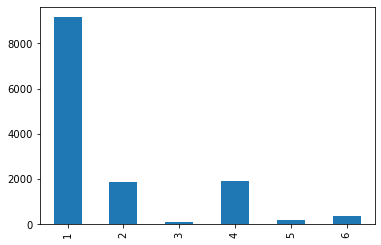

In [524]:
df.outcome.value_counts().sort_index().plot(kind = 'bar')

In [525]:
type(df)

pandas.core.frame.DataFrame

In [526]:
df.outcome

0        1
1        1
2        1
3        1
4        1
        ..
13588    1
13589    2
13590    2
13591    1
13592    1
Name: outcome, Length: 13593, dtype: int64

In [527]:
df.columns

Index(['caseid', 'outcome', 'pregordr', 'birthord', 'birthwgt_lb',
       'birthwgt_oz', 'agepreg', 'pregnum', 'prglngth'],
      dtype='object')

In [528]:
type(df.caseid)

pandas.core.series.Series

In [530]:
[True, False]

[True, False]

In [531]:
sum([True, False])

1

In [532]:
df.isna().sum()

caseid            0
outcome           0
pregordr          0
birthord       4445
birthwgt_lb    4509
birthwgt_oz    4554
agepreg         352
pregnum           0
prglngth          0
dtype: int64

In [533]:
df.shape

(13593, 9)

In [534]:
df

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
0,1,1,1,1.0,8.0,13.0,33.16,2,39
1,1,1,2,2.0,7.0,14.0,39.25,2,39
2,2,1,1,1.0,9.0,2.0,14.33,3,39
3,2,1,2,2.0,7.0,0.0,17.83,3,39
4,2,1,3,3.0,6.0,3.0,18.33,3,39
...,...,...,...,...,...,...,...,...,...
13588,12571,1,1,1.0,6.0,3.0,17.91,5,39
13589,12571,2,2,NaN,NaN,NaN,18.50,5,6
13590,12571,2,3,NaN,NaN,NaN,19.75,5,5
13591,12571,1,4,2.0,7.0,8.0,21.58,5,39


# Filtering for outcome equals to 1

In [535]:
live = df.loc[ df.outcome == 1 , : ]
live

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
0,1,1,1,1.0,8.0,13.0,33.16,2,39
1,1,1,2,2.0,7.0,14.0,39.25,2,39
2,2,1,1,1.0,9.0,2.0,14.33,3,39
3,2,1,2,2.0,7.0,0.0,17.83,3,39
4,2,1,3,3.0,6.0,3.0,18.33,3,39
...,...,...,...,...,...,...,...,...,...
13581,12568,1,2,1.0,6.0,6.0,30.66,3,39
13584,12569,1,2,1.0,6.0,6.0,26.91,2,34
13588,12571,1,1,1.0,6.0,3.0,17.91,5,39
13591,12571,1,4,2.0,7.0,8.0,21.58,5,39


In [536]:
type(live.agepreg)

pandas.core.series.Series

In [537]:
live.loc[live.prglngth == 39,:]

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
0,1,1,1,1.0,8.0,13.0,33.16,2,39
1,1,1,2,2.0,7.0,14.0,39.25,2,39
2,2,1,1,1.0,9.0,2.0,14.33,3,39
3,2,1,2,2.0,7.0,0.0,17.83,3,39
4,2,1,3,3.0,6.0,3.0,18.33,3,39
...,...,...,...,...,...,...,...,...,...
13579,12566,1,2,2.0,7.0,0.0,25.91,2,39
13581,12568,1,2,1.0,6.0,6.0,30.66,3,39
13588,12571,1,1,1.0,6.0,3.0,17.91,5,39
13591,12571,1,4,2.0,7.0,8.0,21.58,5,39


In [538]:
rahul = live.loc[(live.prglngth == 39) & (live.birthwgt_lb>= 6),:]
rahul

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
0,1,1,1,1.0,8.0,13.0,33.16,2,39
1,1,1,2,2.0,7.0,14.0,39.25,2,39
2,2,1,1,1.0,9.0,2.0,14.33,3,39
3,2,1,2,2.0,7.0,0.0,17.83,3,39
4,2,1,3,3.0,6.0,3.0,18.33,3,39
...,...,...,...,...,...,...,...,...,...
13579,12566,1,2,2.0,7.0,0.0,25.91,2,39
13581,12568,1,2,1.0,6.0,6.0,30.66,3,39
13588,12571,1,1,1.0,6.0,3.0,17.91,5,39
13591,12571,1,4,2.0,7.0,8.0,21.58,5,39


In [539]:
rahul.birthwgt_lb.value_counts()

7.0     1705
6.0     1267
8.0      976
9.0      306
10.0      66
11.0       8
13.0       3
14.0       3
12.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

In [540]:
rahul.birthwgt_lb.value_counts(normalize = True)

7.0     0.393038
6.0     0.292070
8.0     0.224988
9.0     0.070539
10.0    0.015214
11.0    0.001844
13.0    0.000692
14.0    0.000692
12.0    0.000692
15.0    0.000231
Name: birthwgt_lb, dtype: float64

<AxesSubplot:>

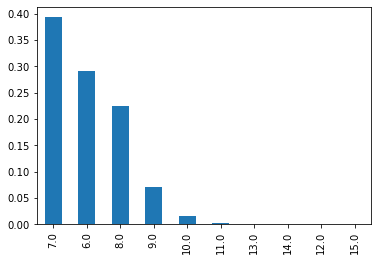

In [541]:
rahul.birthwgt_lb.value_counts(normalize = True).plot(kind = 'bar')

In [542]:
type(rahul.birthwgt_lb.value_counts().reset_index())

pandas.core.frame.DataFrame

<AxesSubplot:>

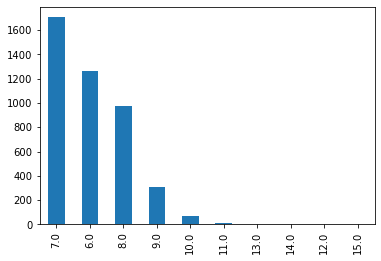

In [543]:
rahul.birthwgt_lb.value_counts().plot(kind= 'bar')

In [544]:
type(rahul.birthwgt_lb.value_counts())

pandas.core.series.Series

In [545]:
live.outcome.value_counts()

1    9148
Name: outcome, dtype: int64

In [546]:
df.describe()

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
count,13593.000000,13593.000000,13593.000000,9148.000000,9084.000000,9039.000000,13241.000000,13593.000000,13593.000000
mean,6216.526595,1.763996,2.349150,1.825645,6.832122,6.917801,24.688151,3.698301,29.531229
std,3645.417341,1.315930,1.577807,1.040395,1.411447,4.602523,5.814708,2.073363,13.802523
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,10.330000,1.000000,0.000000
25%,3022.000000,1.000000,1.000000,1.000000,6.000000,3.000000,20.080000,2.000000,13.000000
50%,6161.000000,1.000000,2.000000,2.000000,7.000000,7.000000,23.910000,3.000000,39.000000
75%,9423.000000,2.000000,3.000000,2.000000,8.000000,11.000000,28.660000,5.000000,39.000000
max,12571.000000,6.000000,19.000000,10.000000,15.000000,15.000000,44.080000,19.000000,50.000000


In [547]:
live.isna().sum()

caseid           0
outcome          0
pregordr         0
birthord         0
birthwgt_lb     64
birthwgt_oz    109
agepreg          0
pregnum          0
prglngth         0
dtype: int64

In [548]:
live.describe()

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
count,9148.000000,9148.0,9148.000000,9148.000000,9084.000000,9039.000000,9148.000000,9148.000000,9148.000000
mean,6176.405444,1.0,2.275251,1.825645,6.832122,6.917801,24.940751,3.477809,38.560560
std,3655.926584,0.0,1.443628,1.040395,1.411447,4.602523,5.567399,1.853568,2.702344
min,1.000000,1.0,1.000000,1.000000,0.000000,0.000000,10.830000,1.000000,0.000000
25%,2965.750000,1.0,1.000000,1.000000,6.000000,3.000000,20.500000,2.000000,39.000000
50%,6060.000000,1.0,2.000000,2.000000,7.000000,7.000000,24.330000,3.000000,39.000000
75%,9388.250000,1.0,3.000000,2.000000,8.000000,11.000000,28.910000,4.000000,39.000000
max,12571.000000,1.0,17.000000,10.000000,15.000000,15.000000,44.080000,19.000000,50.000000


In [549]:
live.prglngth.value_counts()

39    4693
40    1116
38     607
41     587
37     455
42     328
36     321
35     311
43     148
30     138
32     115
34      60
33      49
44      46
26      35
28      32
31      27
29      21
24      13
45      10
22       7
48       7
27       3
25       3
17       2
50       2
21       2
9        1
47       1
18       1
19       1
4        1
20       1
13       1
46       1
23       1
0        1
Name: prglngth, dtype: int64

In [550]:
df.columns

Index(['caseid', 'outcome', 'pregordr', 'birthord', 'birthwgt_lb',
       'birthwgt_oz', 'agepreg', 'pregnum', 'prglngth'],
      dtype='object')

In [551]:
type(df)

pandas.core.frame.DataFrame

In [552]:
pregordr = df['pregordr']

In [553]:
type(pregordr)

pandas.core.series.Series

In [554]:
pregordr

0        1
1        2
2        1
3        2
4        3
        ..
13588    1
13589    2
13590    3
13591    4
13592    5
Name: pregordr, Length: 13593, dtype: int64

# Variables 
1. caseid is the integer ID of the respondent.
2. prglngth is the integer duration of the pregnancy in weeks.
3. outcome is an integer code for the outcome of the pregnancy. The code 1 indicates a live birth.
4. pregordr is a pregnancy serial number; for example, the code for a respondent’s first pregnancy is 1, for the second pregnancy is 2, and so on.
5. birthord is a serial number for live births; the code for a respondent’s first child is 1, and so on. For outcomes other than live birth, this field is blank.
6. birthwgt_lb and birthwgt_oz contain the pounds and ounces parts of the birth weight of the baby.
7. agepreg is the mother’s age at the end of the pregnancy.
8. finalwgt is the statistical weight associated with the respondent. It is a floating-point value that indicates the number of people in the U.S. population this respondent represents.

In [555]:
pd.set_option('display.max_columns', None)

In [556]:
df

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
0,1,1,1,1.0,8.0,13.0,33.16,2,39
1,1,1,2,2.0,7.0,14.0,39.25,2,39
2,2,1,1,1.0,9.0,2.0,14.33,3,39
3,2,1,2,2.0,7.0,0.0,17.83,3,39
4,2,1,3,3.0,6.0,3.0,18.33,3,39
...,...,...,...,...,...,...,...,...,...
13588,12571,1,1,1.0,6.0,3.0,17.91,5,39
13589,12571,2,2,NaN,NaN,NaN,18.50,5,6
13590,12571,2,3,NaN,NaN,NaN,19.75,5,5
13591,12571,1,4,2.0,7.0,8.0,21.58,5,39


In [557]:
df

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
0,1,1,1,1.0,8.0,13.0,33.16,2,39
1,1,1,2,2.0,7.0,14.0,39.25,2,39
2,2,1,1,1.0,9.0,2.0,14.33,3,39
3,2,1,2,2.0,7.0,0.0,17.83,3,39
4,2,1,3,3.0,6.0,3.0,18.33,3,39
...,...,...,...,...,...,...,...,...,...
13588,12571,1,1,1.0,6.0,3.0,17.91,5,39
13589,12571,2,2,NaN,NaN,NaN,18.50,5,6
13590,12571,2,3,NaN,NaN,NaN,19.75,5,5
13591,12571,1,4,2.0,7.0,8.0,21.58,5,39


In [558]:
df.outcome.value_counts().sort_index()

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

In [559]:
df.birthwgt_lb.value_counts().sort_index()

0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

In [560]:
caseid = 10229

In [561]:
preg_map = nsfg.MakePregMap(df)

In [562]:
indices = preg_map[caseid]
indices

[11093, 11094, 11095, 11096, 11097, 11098, 11099]

In [563]:
df.outcome[indices]

11093    4
11094    4
11095    4
11096    4
11097    4
11098    4
11099    1
Name: outcome, dtype: int64

In [564]:
df.loc[indices]

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
11093,10229,4,1,NaN,NaN,NaN,19.58,7,2
11094,10229,4,2,NaN,NaN,NaN,21.75,7,3
11095,10229,4,3,NaN,NaN,NaN,23.83,7,4
11096,10229,4,4,NaN,NaN,NaN,25.50,7,2
11097,10229,4,5,NaN,NaN,NaN,29.08,7,3
11098,10229,4,6,NaN,NaN,NaN,32.16,7,13
11099,10229,1,7,1.0,7.0,11.0,33.16,7,43


In [565]:
df.loc[df.caseid ==10229,:]

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
11093,10229,4,1,NaN,NaN,NaN,19.58,7,2
11094,10229,4,2,NaN,NaN,NaN,21.75,7,3
11095,10229,4,3,NaN,NaN,NaN,23.83,7,4
11096,10229,4,4,NaN,NaN,NaN,25.50,7,2
11097,10229,4,5,NaN,NaN,NaN,29.08,7,3
11098,10229,4,6,NaN,NaN,NaN,32.16,7,13
11099,10229,1,7,1.0,7.0,11.0,33.16,7,43


In [566]:
df

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
0,1,1,1,1.0,8.0,13.0,33.16,2,39
1,1,1,2,2.0,7.0,14.0,39.25,2,39
2,2,1,1,1.0,9.0,2.0,14.33,3,39
3,2,1,2,2.0,7.0,0.0,17.83,3,39
4,2,1,3,3.0,6.0,3.0,18.33,3,39
...,...,...,...,...,...,...,...,...,...
13588,12571,1,1,1.0,6.0,3.0,17.91,5,39
13589,12571,2,2,NaN,NaN,NaN,18.50,5,6
13590,12571,2,3,NaN,NaN,NaN,19.75,5,5
13591,12571,1,4,2.0,7.0,8.0,21.58,5,39


In [567]:
df[df.caseid ==12571]

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
13588,12571,1,1,1.0,6.0,3.0,17.91,5,39
13589,12571,2,2,NaN,NaN,NaN,18.50,5,6
13590,12571,2,3,NaN,NaN,NaN,19.75,5,5
13591,12571,1,4,2.0,7.0,8.0,21.58,5,39
13592,12571,1,5,3.0,7.0,8.0,21.58,5,39


In [568]:
df.pregnum

0        2
1        2
2        3
3        3
4        3
        ..
13588    5
13589    5
13590    5
13591    5
13592    5
Name: pregnum, Length: 13593, dtype: int64

#### Think about questions you find personally interesting, or items of conven- tional wisdom, or controversial topics, or questions that have political conse- quences, and see if you can formulate a question that lends itself to statistical inquiry.

#### Each of you can pick up a project that requires to pose a statistical question, find a dataset that can address it, and apply each of the techniques you learn to their own data.

# Distributions

## Histograms

In [695]:
live.head()

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
0,1,1,1,1.0,8.0,13.0,33.16,2,39
1,1,1,2,2.0,7.0,14.0,39.25,2,39
2,2,1,1,1.0,9.0,2.0,14.33,3,39
3,2,1,2,2.0,7.0,0.0,17.83,3,39
4,2,1,3,3.0,6.0,3.0,18.33,3,39


In [696]:
live.describe()

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
count,9148.000000,9148.0,9148.000000,9148.000000,9084.000000,9039.000000,9148.000000,9148.000000,9148.000000
mean,6176.405444,1.0,2.275251,1.825645,6.832122,6.917801,24.940751,3.477809,38.560560
std,3655.926584,0.0,1.443628,1.040395,1.411447,4.602523,5.567399,1.853568,2.702344
min,1.000000,1.0,1.000000,1.000000,0.000000,0.000000,10.830000,1.000000,0.000000
25%,2965.750000,1.0,1.000000,1.000000,6.000000,3.000000,20.500000,2.000000,39.000000
50%,6060.000000,1.0,2.000000,2.000000,7.000000,7.000000,24.330000,3.000000,39.000000
75%,9388.250000,1.0,3.000000,2.000000,8.000000,11.000000,28.910000,4.000000,39.000000
max,12571.000000,1.0,17.000000,10.000000,15.000000,15.000000,44.080000,19.000000,50.000000


In [570]:
import matplotlib.pyplot as plt

In [571]:
live.shape

(9148, 9)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 7.000e+00, 1.000e+00,
        1.300e+01, 3.000e+00, 3.500e+01, 3.000e+00, 3.200e+01, 2.100e+01,
        1.380e+02, 2.700e+01, 1.150e+02, 4.900e+01, 6.000e+01, 3.110e+02,
        3.210e+02, 4.550e+02, 6.070e+02, 4.693e+03, 1.116e+03, 5.870e+02,
        3.280e+02, 1.480e+02, 4.600e+01, 1.000e+01, 1.000e+00, 1.000e+00,
        7.000e+00, 2.000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]),
 <BarContainer object of 50 artists>)

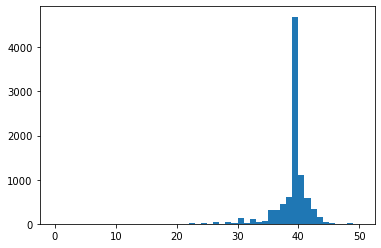

In [573]:
plt.hist(live.prglngth, bins =50)

In [574]:
live.describe()

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
count,9148.000000,9148.0,9148.000000,9148.000000,9084.000000,9039.000000,9148.000000,9148.000000,9148.000000
mean,6176.405444,1.0,2.275251,1.825645,6.832122,6.917801,24.940751,3.477809,38.560560
std,3655.926584,0.0,1.443628,1.040395,1.411447,4.602523,5.567399,1.853568,2.702344
min,1.000000,1.0,1.000000,1.000000,0.000000,0.000000,10.830000,1.000000,0.000000
25%,2965.750000,1.0,1.000000,1.000000,6.000000,3.000000,20.500000,2.000000,39.000000
50%,6060.000000,1.0,2.000000,2.000000,7.000000,7.000000,24.330000,3.000000,39.000000
75%,9388.250000,1.0,3.000000,2.000000,8.000000,11.000000,28.910000,4.000000,39.000000
max,12571.000000,1.0,17.000000,10.000000,15.000000,15.000000,44.080000,19.000000,50.000000


(array([2.000e+00, 1.000e+00, 1.000e+00, 4.000e+00, 2.400e+01, 9.400e+01,
        3.890e+02, 6.387e+03, 2.225e+03, 2.100e+01]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <BarContainer object of 10 artists>)

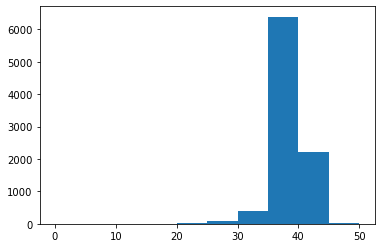

In [575]:
plt.hist(live.prglngth)

In [576]:
live.prglngth.mean()

38.56055968517709

In [577]:
live.prglngth.value_counts().sort_index()

0        1
4        1
9        1
13       1
17       2
18       1
19       1
20       1
21       2
22       7
23       1
24      13
25       3
26      35
27       3
28      32
29      21
30     138
31      27
32     115
33      49
34      60
35     311
36     321
37     455
38     607
39    4693
40    1116
41     587
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

# Outliers

The One way to handle outliers depends on “domain knowledge”; that is, information about where the data come from and what they mean. And it depends on what analysis you are planning to perform.

In [578]:
live.prglngth.value_counts().sort_index()

0        1
4        1
9        1
13       1
17       2
18       1
19       1
20       1
21       2
22       7
23       1
24      13
25       3
26      35
27       3
28      32
29      21
30     138
31      27
32     115
33      49
34      60
35     311
36     321
37     455
38     607
39    4693
40    1116
41     587
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

Values below 10 weeks are certainly errors; the most likely explanation is that the outcome was not coded correctly. Values higher than 30 weeks are probably legitimate.

Most doctors recommend induced labor if a pregnancy exceeds 42 weeks, so some of the longer values are surprising. In particular, 50 weeks seems medically unlikely.

In our example, the motivating question is whether first babies tend to be early (or late). When people ask this question, they are usually interested in full-term pregnancies, so for this analysis we will focus on pregnancies longer than 27 weeks.

In [697]:
live.head()

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
0,1,1,1,1.0,8.0,13.0,33.16,2,39
1,1,1,2,2.0,7.0,14.0,39.25,2,39
2,2,1,1,1.0,9.0,2.0,14.33,3,39
3,2,1,2,2.0,7.0,0.0,17.83,3,39
4,2,1,3,3.0,6.0,3.0,18.33,3,39


In [698]:
live.loc[live.prglngth<5]

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
4108,3664,1,2,2.0,7.0,0.0,21.00,3,4
6458,5849,1,2,1.0,8.0,0.0,22.08,3,0


In [579]:
live.shape

(9148, 9)

# Filter for pregnancies longer than 27 weeks (based on domain knowledge)

In [600]:
live_wo_outliers = live.loc[live.prglngth>= 27]

(array([5.600e+01, 1.650e+02, 1.640e+02, 6.920e+02, 1.062e+03, 5.809e+03,
        1.063e+03, 5.600e+01, 2.000e+00, 9.000e+00]),
 array([27. , 29.3, 31.6, 33.9, 36.2, 38.5, 40.8, 43.1, 45.4, 47.7, 50. ]),
 <BarContainer object of 10 artists>)

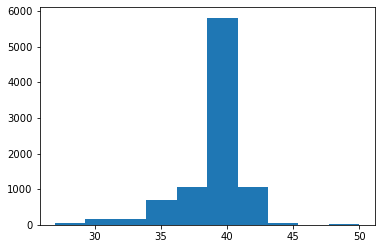

In [601]:
plt.hist(live_wo_outliers.prglngth)

In [602]:
live_wo_outliers.shape

(9078, 9)

In [699]:
live_wo_outliers.reset_index(drop = True)

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
0,1,1,1,1.0,8.0,13.0,33.16,2,39
1,1,1,2,2.0,7.0,14.0,39.25,2,39
2,2,1,1,1.0,9.0,2.0,14.33,3,39
3,2,1,2,2.0,7.0,0.0,17.83,3,39
4,2,1,3,3.0,6.0,3.0,18.33,3,39
...,...,...,...,...,...,...,...,...,...
9073,12568,1,2,1.0,6.0,6.0,30.66,3,39
9074,12569,1,2,1.0,6.0,6.0,26.91,2,34
9075,12571,1,1,1.0,6.0,3.0,17.91,5,39
9076,12571,1,4,2.0,7.0,8.0,21.58,5,39


# Create separate dataframes for first babies vs others 

In [621]:
firsts = live_wo_outliers.loc[live_wo_outliers.birthord == 1].reset_index(drop = True)
others = live_wo_outliers.loc[live_wo_outliers.birthord != 1].reset_index(drop = True)

In [622]:
firsts.shape

(4381, 9)

In [623]:
others.shape

(4697, 9)

In [624]:
firsts

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
0,1,1,1,1.0,8.0,13.0,33.16,2,39
1,2,1,1,1.0,9.0,2.0,14.33,3,39
2,6,1,1,1.0,8.0,9.0,27.00,3,38
3,7,1,1,1.0,7.0,9.0,28.08,2,39
4,12,1,1,1.0,7.0,13.0,25.75,1,39
...,...,...,...,...,...,...,...,...,...
4376,12565,1,1,1.0,6.0,7.0,31.66,2,39
4377,12566,1,1,1.0,6.0,0.0,24.00,2,39
4378,12568,1,2,1.0,6.0,6.0,30.66,3,39
4379,12569,1,2,1.0,6.0,6.0,26.91,2,34


# Compare mean of the pregnancy length two data sets to see of there is any significant difference

In [625]:
firsts.prglngth.mean()

38.710340104998856

In [626]:
others.prglngth.mean()

38.64786033638492

And here's the difference (in weeks):

In [627]:
firsts.prglngth.mean() - others.prglngth.mean()

0.06247976861393312

**The difference is 0.062 weeks, which works out to 13 hours. As a fraction of the typical pregnancy length, this difference is about 0.2%.
If we assume this estimate is accurate, such a difference would have no practical consequences. In fact, without observing a large number of pregnancies, it is unlikely that anyone would notice this difference at all.**

# Topics Covered

Under Descriptive Analytics
1. 5 point summary - min, 25%, 50%, 75%, max
2. buliding the distribution plot using 5 point summary
3. histograms
4. removing outliers - using domain knowledge
5. Answer of the Question - Comparing the mean

# Next 
6. removing outliers - using IQR
7. box plot
8. Discrete Probability Distribution/ Probability Mass Function

In [720]:
firsts.dtypes

caseid           int64
outcome          int64
pregordr         int64
birthord       float64
birthwgt_lb    float64
birthwgt_oz    float64
agepreg        float64
pregnum          int64
prglngth         int64
dtype: object

In [721]:
firsts.head()

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
0,1,1,1,1.0,8.0,13.0,33.16,2,39
1,2,1,1,1.0,9.0,2.0,14.33,3,39
2,6,1,1,1.0,8.0,9.0,27.00,3,38
3,7,1,1,1.0,7.0,9.0,28.08,2,39
4,12,1,1,1.0,7.0,13.0,25.75,1,39


In [722]:
firsts.shape

(4381, 9)

In [723]:
firsts.loc[ :, ['birthwgt_lb']]

,birthwgt_lb
0,8.0
1,9.0
2,8.0
3,7.0
4,7.0
...,...
4376,6.0
4377,6.0
4378,6.0
4379,6.0


(array([  18.,  465., 1189.,  974.,  704.,  515.,  332.,  116.,   58.,
          10.]),
 array([10.83 , 14.047, 17.264, 20.481, 23.698, 26.915, 30.132, 33.349,
        36.566, 39.783, 43.   ]),
 <BarContainer object of 10 artists>)

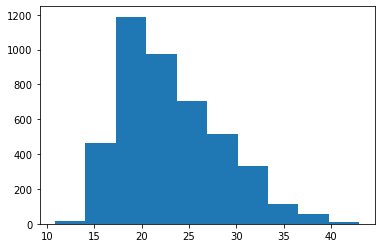

In [725]:
plt.hist(firsts.agepreg)

In [727]:
import seaborn as sns

/Users/rahulgarg/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='agepreg'>

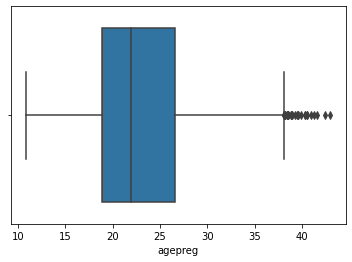

In [765]:
sns.boxplot(firsts.agepreg, whis = 1.5)

In [729]:
firsts.agepreg.describe()

count    4381.000000
mean       23.080662
std         5.283655
min        10.830000
25%        18.910000
50%        21.910000
75%        26.580000
max        43.000000
Name: agepreg, dtype: float64

In [732]:
firsts.agepreg.value_counts()

18.58    46
18.83    44
20.75    40
20.91    40
19.66    40
         ..
36.08     1
41.58     1
36.25     1
13.58     1
11.75     1
Name: agepreg, Length: 315, dtype: int64

In [731]:
iqr = 26.58-18.91
iqr

7.669999999999998

In [733]:
18.910000 - 1.5*iqr

7.405000000000003

In [734]:
26.580000 + 1.5*iqr

38.084999999999994

In [ ]:
firsts.agepreg.describe()

# Outlier Removal Using Inter Quartile Range/ Box Plot

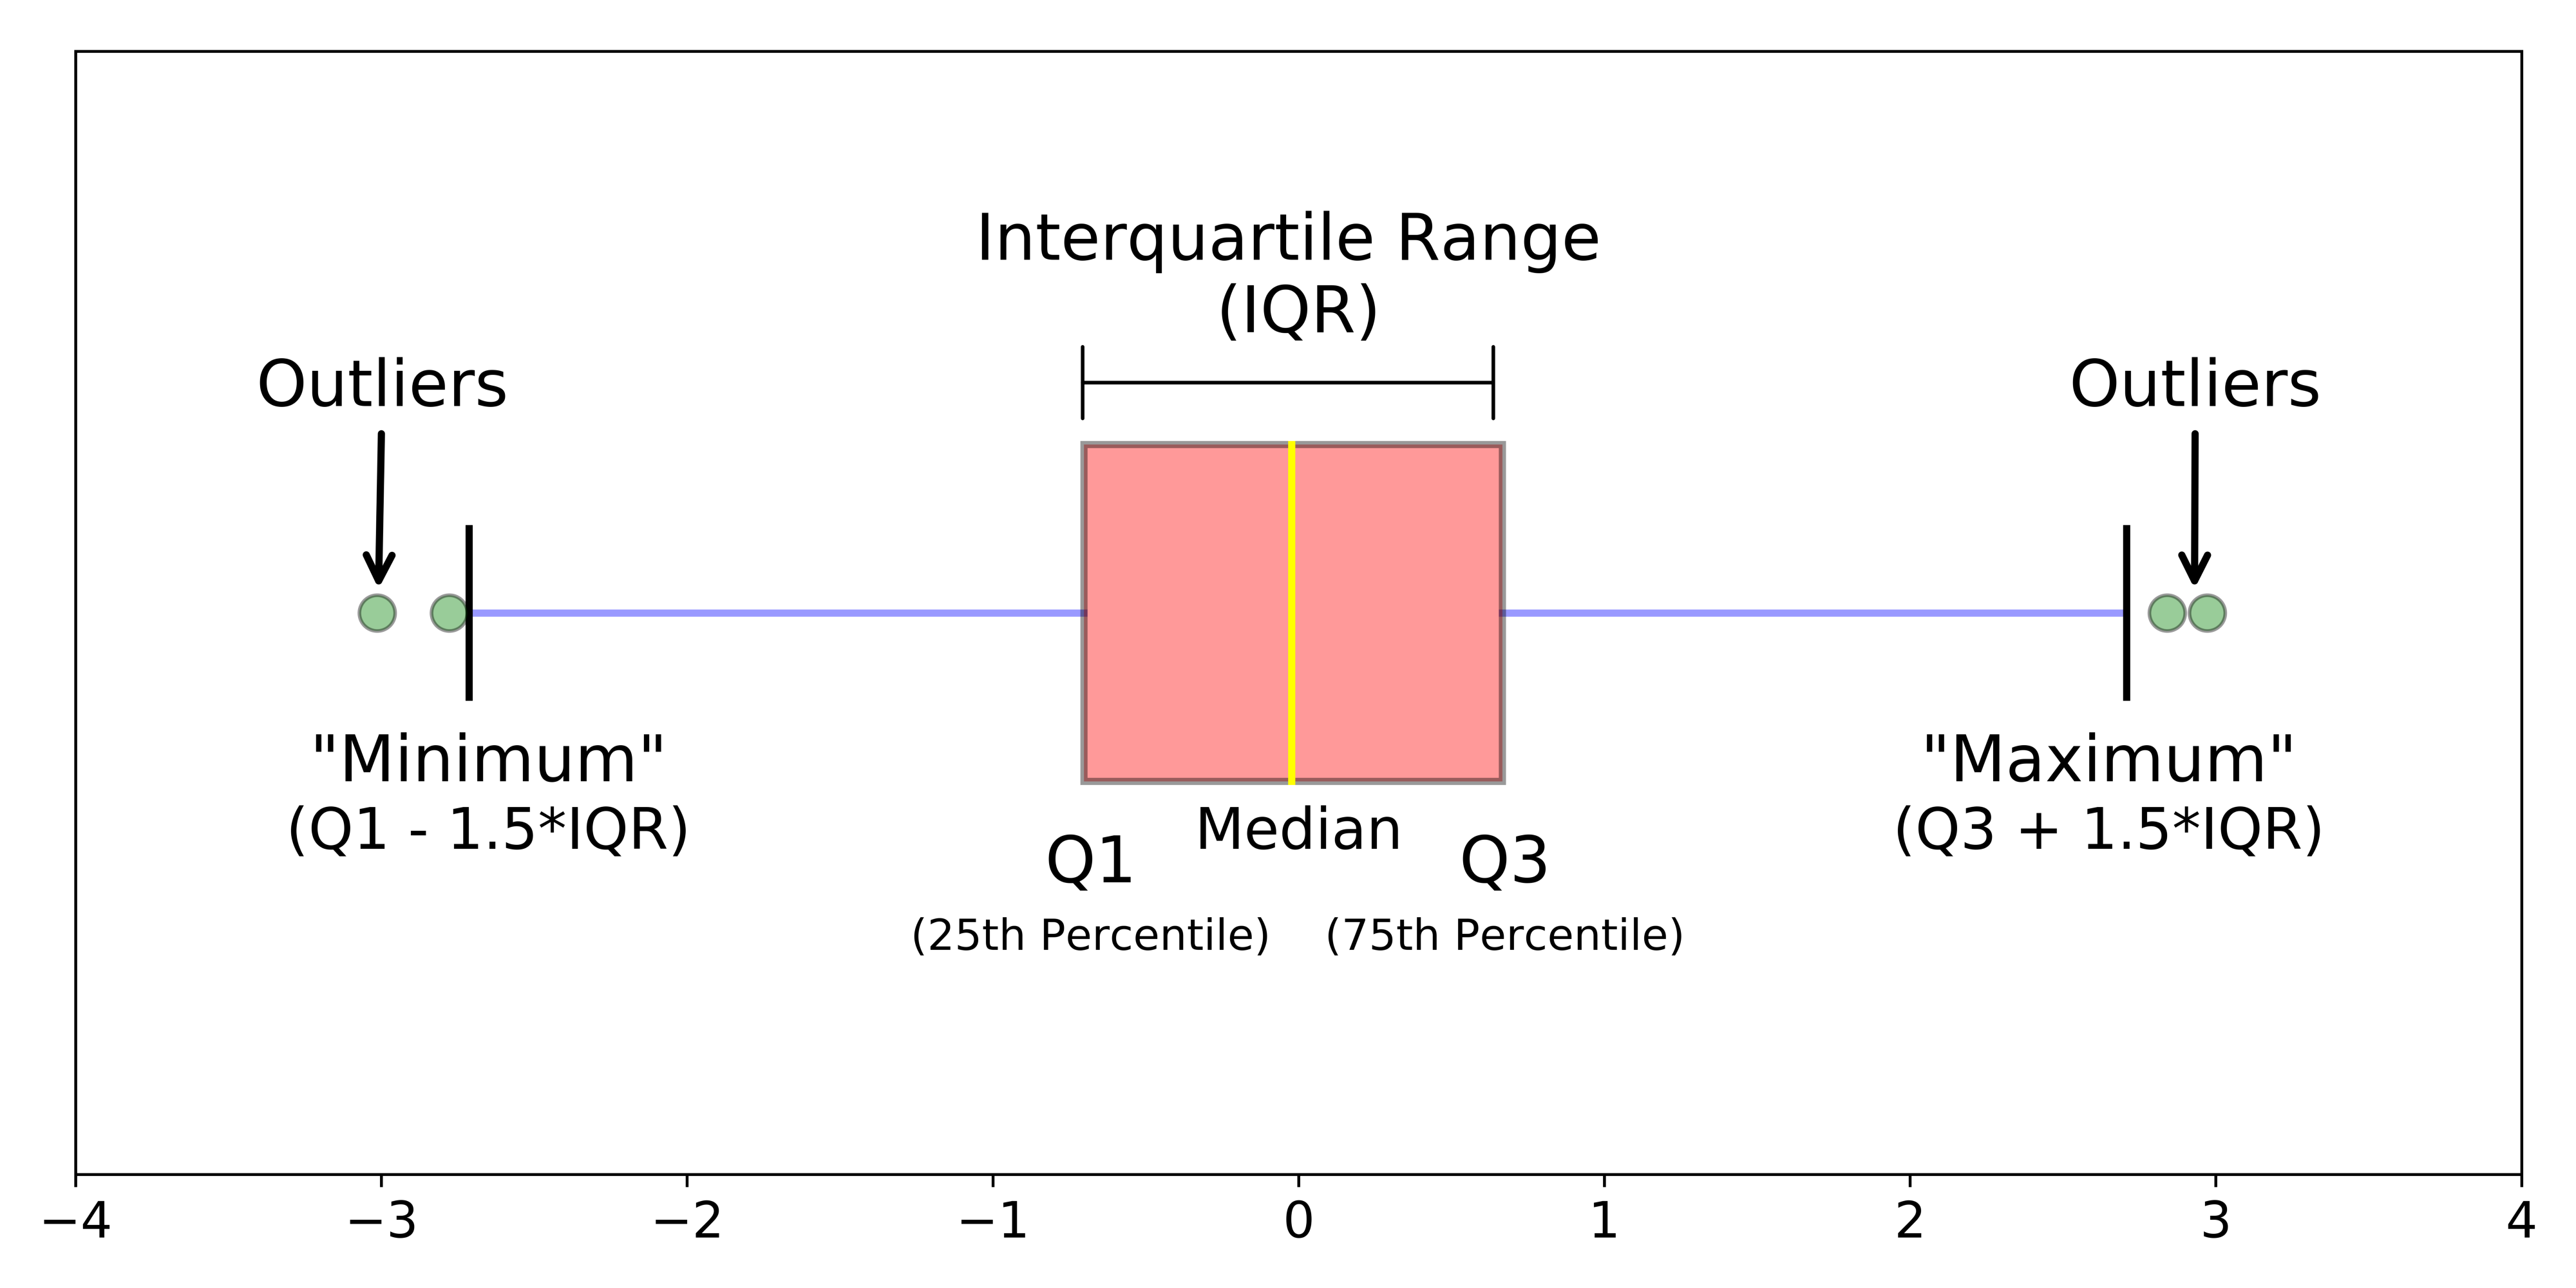

In [628]:
from IPython.display import Image
Image("/Users/rahulgarg/github/ThinkStats2/boxplot.png")

https://www.kdnuggets.com/2019/11/understanding-boxplots.html

# Box Plots

In [772]:
live.shape

(9148, 9)

In [771]:
live.head()

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
0,1,1,1,1.0,8.0,13.0,33.16,2,39
1,1,1,2,2.0,7.0,14.0,39.25,2,39
2,2,1,1,1.0,9.0,2.0,14.33,3,39
3,2,1,2,2.0,7.0,0.0,17.83,3,39
4,2,1,3,3.0,6.0,3.0,18.33,3,39


In [768]:
live.reset_index(drop = True, inplace = True)

In [778]:
live.prglngth.describe([0.05, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 0.95])

count    9148.000000
mean       38.560560
std         2.702344
min         0.000000
5%         34.000000
10%        36.000000
20%        38.000000
30%        39.000000
40%        39.000000
50%        39.000000
60%        39.000000
70%        39.000000
80%        40.000000
90%        41.000000
95%        42.000000
max        50.000000
Name: prglngth, dtype: float64

In [795]:
live['flag'] = 'outliers_values'

<ipython-input-795-7862487c1336>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  live['flag'] = 'outliers_values'


In [796]:
live.loc[(live.prglngth>=34) & (live.prglngth<=42), 'flag'] = 'valid_values'

/Users/rahulgarg/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [797]:
live

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth,flag
0,1,1,1,1.0,8.0,13.0,33.16,2,39,valid_values
1,1,1,2,2.0,7.0,14.0,39.25,2,39,valid_values
2,2,1,1,1.0,9.0,2.0,14.33,3,39,valid_values
3,2,1,2,2.0,7.0,0.0,17.83,3,39,valid_values
4,2,1,3,3.0,6.0,3.0,18.33,3,39,valid_values
...,...,...,...,...,...,...,...,...,...,...
9143,12568,1,2,1.0,6.0,6.0,30.66,3,39,valid_values
9144,12569,1,2,1.0,6.0,6.0,26.91,2,34,valid_values
9145,12571,1,1,1.0,6.0,3.0,17.91,5,39,valid_values
9146,12571,1,4,2.0,7.0,8.0,21.58,5,39,valid_values


In [799]:
live.loc[live.flag == 'outliers_values']

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth,flag
13,15,1,2,1.0,7.0,11.0,28.33,3,33,outliers_values
14,15,1,3,2.0,7.0,8.0,30.33,3,33,outliers_values
98,149,1,1,1.0,6.0,2.0,16.91,3,43,outliers_values
99,149,1,2,2.0,9.0,5.0,17.83,3,43,outliers_values
106,150,1,6,6.0,6.0,8.0,23.50,6,9,outliers_values
...,...,...,...,...,...,...,...,...,...,...
9051,12427,1,3,2.0,10.0,2.0,20.83,3,44,outliers_values
9109,12518,1,1,1.0,6.0,15.0,30.25,1,33,outliers_values
9115,12535,1,2,2.0,2.0,13.0,25.50,3,30,outliers_values
9117,12539,1,1,1.0,4.0,2.0,18.50,4,30,outliers_values


In [790]:
live.flag.value_counts()

valid_values       8478
outliers_values     670
Name: flag, dtype: int64

In [791]:
live_wo_outliers = live.loc[(live.prglngth>=34) & (live.prglngth<=42)]

In [802]:
live_wo_outliers.reset_index(drop = True, inplace = True)

In [803]:
live_wo_outliers

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth,flag
0,1,1,1,1.0,8.0,13.0,33.16,2,39,valid_values
1,1,1,2,2.0,7.0,14.0,39.25,2,39,valid_values
2,2,1,1,1.0,9.0,2.0,14.33,3,39,valid_values
3,2,1,2,2.0,7.0,0.0,17.83,3,39,valid_values
4,2,1,3,3.0,6.0,3.0,18.33,3,39,valid_values
...,...,...,...,...,...,...,...,...,...,...
8473,12568,1,2,1.0,6.0,6.0,30.66,3,39,valid_values
8474,12569,1,2,1.0,6.0,6.0,26.91,2,34,valid_values
8475,12571,1,1,1.0,6.0,3.0,17.91,5,39,valid_values
8476,12571,1,4,2.0,7.0,8.0,21.58,5,39,valid_values


In [804]:
firsts = live_wo_outliers.loc[live_wo_outliers.birthord==1]
others = live_wo_outliers.loc[live_wo_outliers.birthord!=1]

In [805]:
firsts.prglngth.mean()

38.97188655980271

In [806]:
others.prglngth.mean()

38.85620619489035

In [807]:
firsts.prglngth.mean() - others.prglngth.mean()

0.11568036491236455

In [808]:
0.11568036491236455/39

0.0029661632028811424

(array([2.000e+00, 1.000e+00, 1.000e+00, 4.000e+00, 2.400e+01, 9.400e+01,
        3.890e+02, 6.387e+03, 2.225e+03, 2.100e+01]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <BarContainer object of 10 artists>)

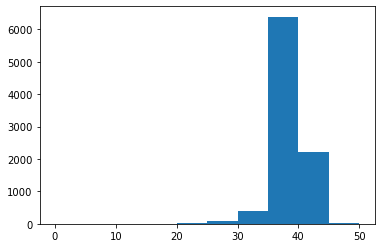

In [777]:
plt.hist(live.prglngth)

/Users/rahulgarg/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prglngth'>

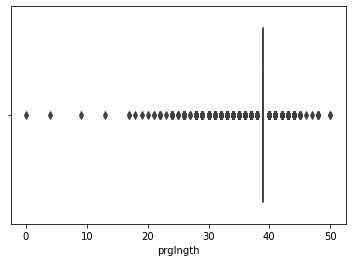

In [770]:
sns.boxplot(live.prglngth)

(array([5.600e+01, 1.650e+02, 1.640e+02, 6.920e+02, 1.062e+03, 5.809e+03,
        1.063e+03, 5.600e+01, 2.000e+00, 9.000e+00]),
 array([27. , 29.3, 31.6, 33.9, 36.2, 38.5, 40.8, 43.1, 45.4, 47.7, 50. ]),
 <BarContainer object of 10 artists>)

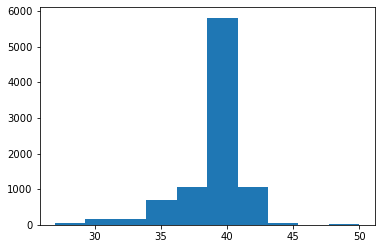

In [613]:
plt.hist(live_wo_outliers.prglngth)

In [614]:
live_wo_outliers.prglngth.value_counts()

39    4693
40    1116
38     607
41     587
37     455
42     328
36     321
35     311
43     148
30     138
32     115
34      60
33      49
44      46
28      32
31      27
29      21
45      10
48       7
27       3
50       2
46       1
47       1
Name: prglngth, dtype: int64

### Histograms are useful because they make the most frequent values immediately apparent. But they are not the best choice for comparing two distribtions. In this example, there are fewer “first babies” than “others,” so some of the apparent differences in the histograms are due to sample sizes. In the next chapter we address this problem using probability mass functions.

(array([1.000e+01, 2.300e+01, 1.620e+02, 3.580e+02, 2.632e+03, 8.160e+02,
        3.220e+02, 1.400e+01, 9.000e+00, 2.000e+00]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

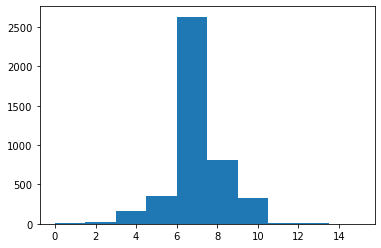

In [686]:
plt.hist(firsts.birthwgt_lb)

# Probability mass functions: Discrete probability distributions
### When we use a probability function to describe a discrete probability distribution we call it a probability mass function (commonly abbreviated as pmf).

https://towardsdatascience.com/probability-concepts-explained-probability-distributions-introduction-part-3-4a5db81858dc#:~:text=A%20probability%20distribution%20is%20a%20list%20of%20outcomes%20and%20their%20associated%20probabilities.&text=A%20function%20that%20represents%20a,called%20a%20probability%20density%20function.

To get from frequencies to probabilities, we divide through by n, which is called normalization.


X  -> prglngth

In [813]:
# We will use the firsts dataframe for further Analysis
firsts.shape

(4055, 10)

(array([  29.,  159.,  172.,  208.,    0.,  272., 2114.,  536.,  360.,
         205.]),
 array([34. , 34.8, 35.6, 36.4, 37.2, 38. , 38.8, 39.6, 40.4, 41.2, 42. ]),
 <BarContainer object of 10 artists>)

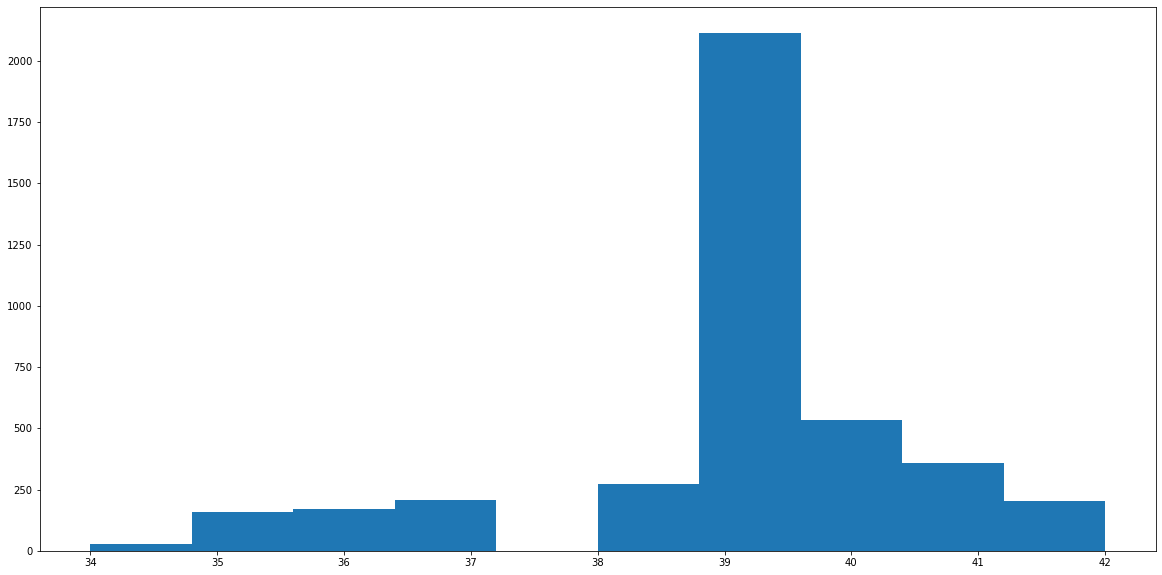

In [822]:
plt.figure(figsize = (20,10))
plt.hist(firsts.prglngth)

In [815]:
firsts.prglngth.value_counts()

39    2114
40     536
41     360
38     272
37     208
42     205
36     172
35     159
34      29
Name: prglngth, dtype: int64

In [816]:
2114/4055

0.5213316892725031

In [817]:
firsts.prglngth.value_counts(normalize = True)

39    0.521332
40    0.132182
41    0.088779
38    0.067078
37    0.051295
42    0.050555
36    0.042417
35    0.039211
34    0.007152
Name: prglngth, dtype: float64

In [ ]:
39 - 52%
other week - 48%

Text(0, 0.5, 'Probability')

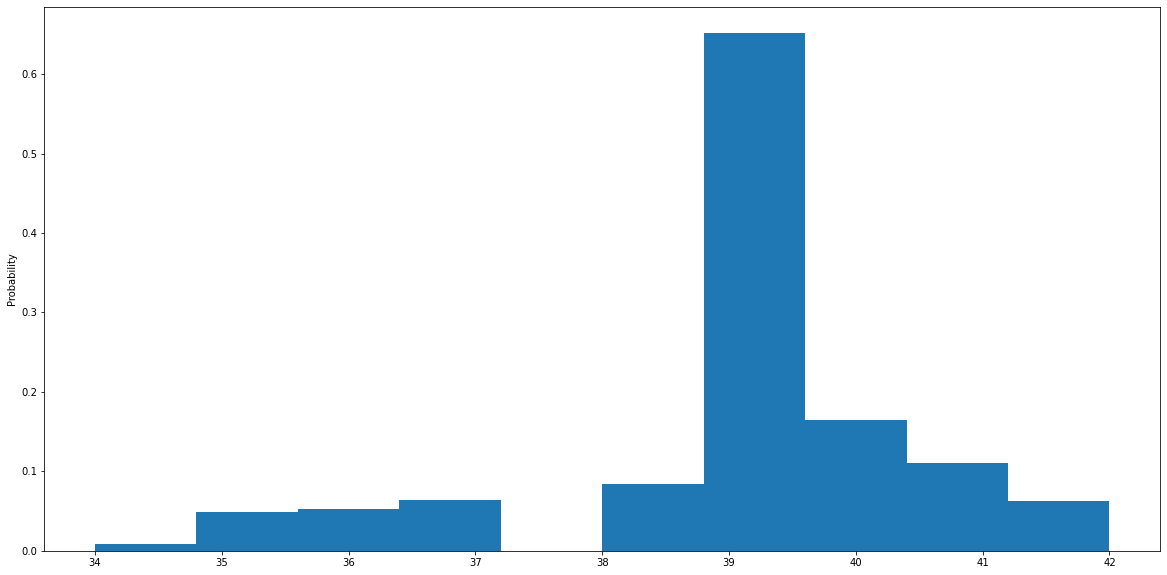

In [821]:
plt.figure(figsize = (20,10))
plt.hist(firsts.prglngth, density = True)
plt.ylabel('Probability')

In [693]:
firsts.head()

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,pregnum,prglngth
0,1,1,1,1.0,8.0,13.0,33.16,2,39
1,2,1,1,1.0,9.0,2.0,14.33,3,39
2,6,1,1,1.0,8.0,9.0,27.00,3,38
3,7,1,1,1.0,7.0,9.0,28.08,2,39
4,12,1,1,1.0,7.0,13.0,25.75,1,39


# Question : In a hospital, if 3 new cases of firsts births arrive
# What is the probility for exactly two births happeing in week 39

In [681]:
dct = {'P(X = 0)':['1/8',.125], 
       'P(X = 1)':['3/8',.375],
       'P(X = 2)':['3/8',.375],
      'P(X = 3)':['1/8',.125]}

In [682]:
dct.items()

dict_items([('P(X = 0)', ['1/8', 0.125]), ('P(X = 1)', ['3/8', 0.375]), ('P(X = 2)', ['3/8', 0.375]), ('P(X = 3)', ['1/8', 0.125])])

In [683]:
pmf =pd.DataFrame(dct.values(), index = dct.keys(), columns = ['probability', 'p'])
pmf

,probability,p
P(X = 0),1/8,0.125
P(X = 1),3/8,0.375
P(X = 2),3/8,0.375
P(X = 3),1/8,0.125


<AxesSubplot:>

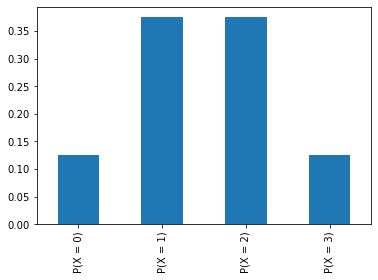

In [684]:
pmf.p.plot(kind = 'bar')

# Expected Value of a Random Variable

https://brilliant.org/wiki/discrete-random-variables-probability-density/

https://brilliant.org/practice/discrete-random-variables-problem-solving/?subtopic=random-variables&chapter=discrete-random-variables&p=1

https://brilliant.org/practice/binomial-distribution/?subtopic=random-variables&chapter=discrete-probability-distributions

# Understanding Variance and Standard Deviation

Variance is a summary statistic intended to describe the variability or spread of a distribution. 
The square root of variance, S, is the standard deviation.

In [439]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()
print('mean:', mean)
print('variance:', var)
print('std:', std)

mean: 38.67801277814497
variance: 5.373562999947158
std: 2.3180946917559595


Here's are the mean pregnancy lengths for first babies and others:

**For all live births, the mean pregnancy length is 38.6 weeks, the standard deviation is 2.7 weeks, which means we should expect deviations of 2-3 weeks to be common.
Variance of pregnancy length is 7.3, which is hard to interpret, especially since the units are weeks2, or “square weeks.” Variance is useful in some calculations, but it is not a good summary statistic.**

In [403]:
live.head()

,caseid,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,finalwgt,pregnum,prglngth
0,1,1,1,1.0,8.0,13.0,33.16,6448.271112,2,39
1,1,1,2,2.0,7.0,14.0,39.25,6448.271112,2,39
2,2,1,1,1.0,9.0,2.0,14.33,12999.542264,3,39
3,2,1,2,2.0,7.0,0.0,17.83,12999.542264,3,39
4,2,1,3,3.0,6.0,3.0,18.33,12999.542264,3,39


# Covered Till now

Descriptive Statistics

1. Univariate
    - location -> Mean, Median, Q1, Q3
    - variation -> standard deviation, IQR
    
Next
    
2. Bi-variate
    - covariance, correlation
    
3. Multi-variate
    - linear regression
    - scatter plot/pair plot

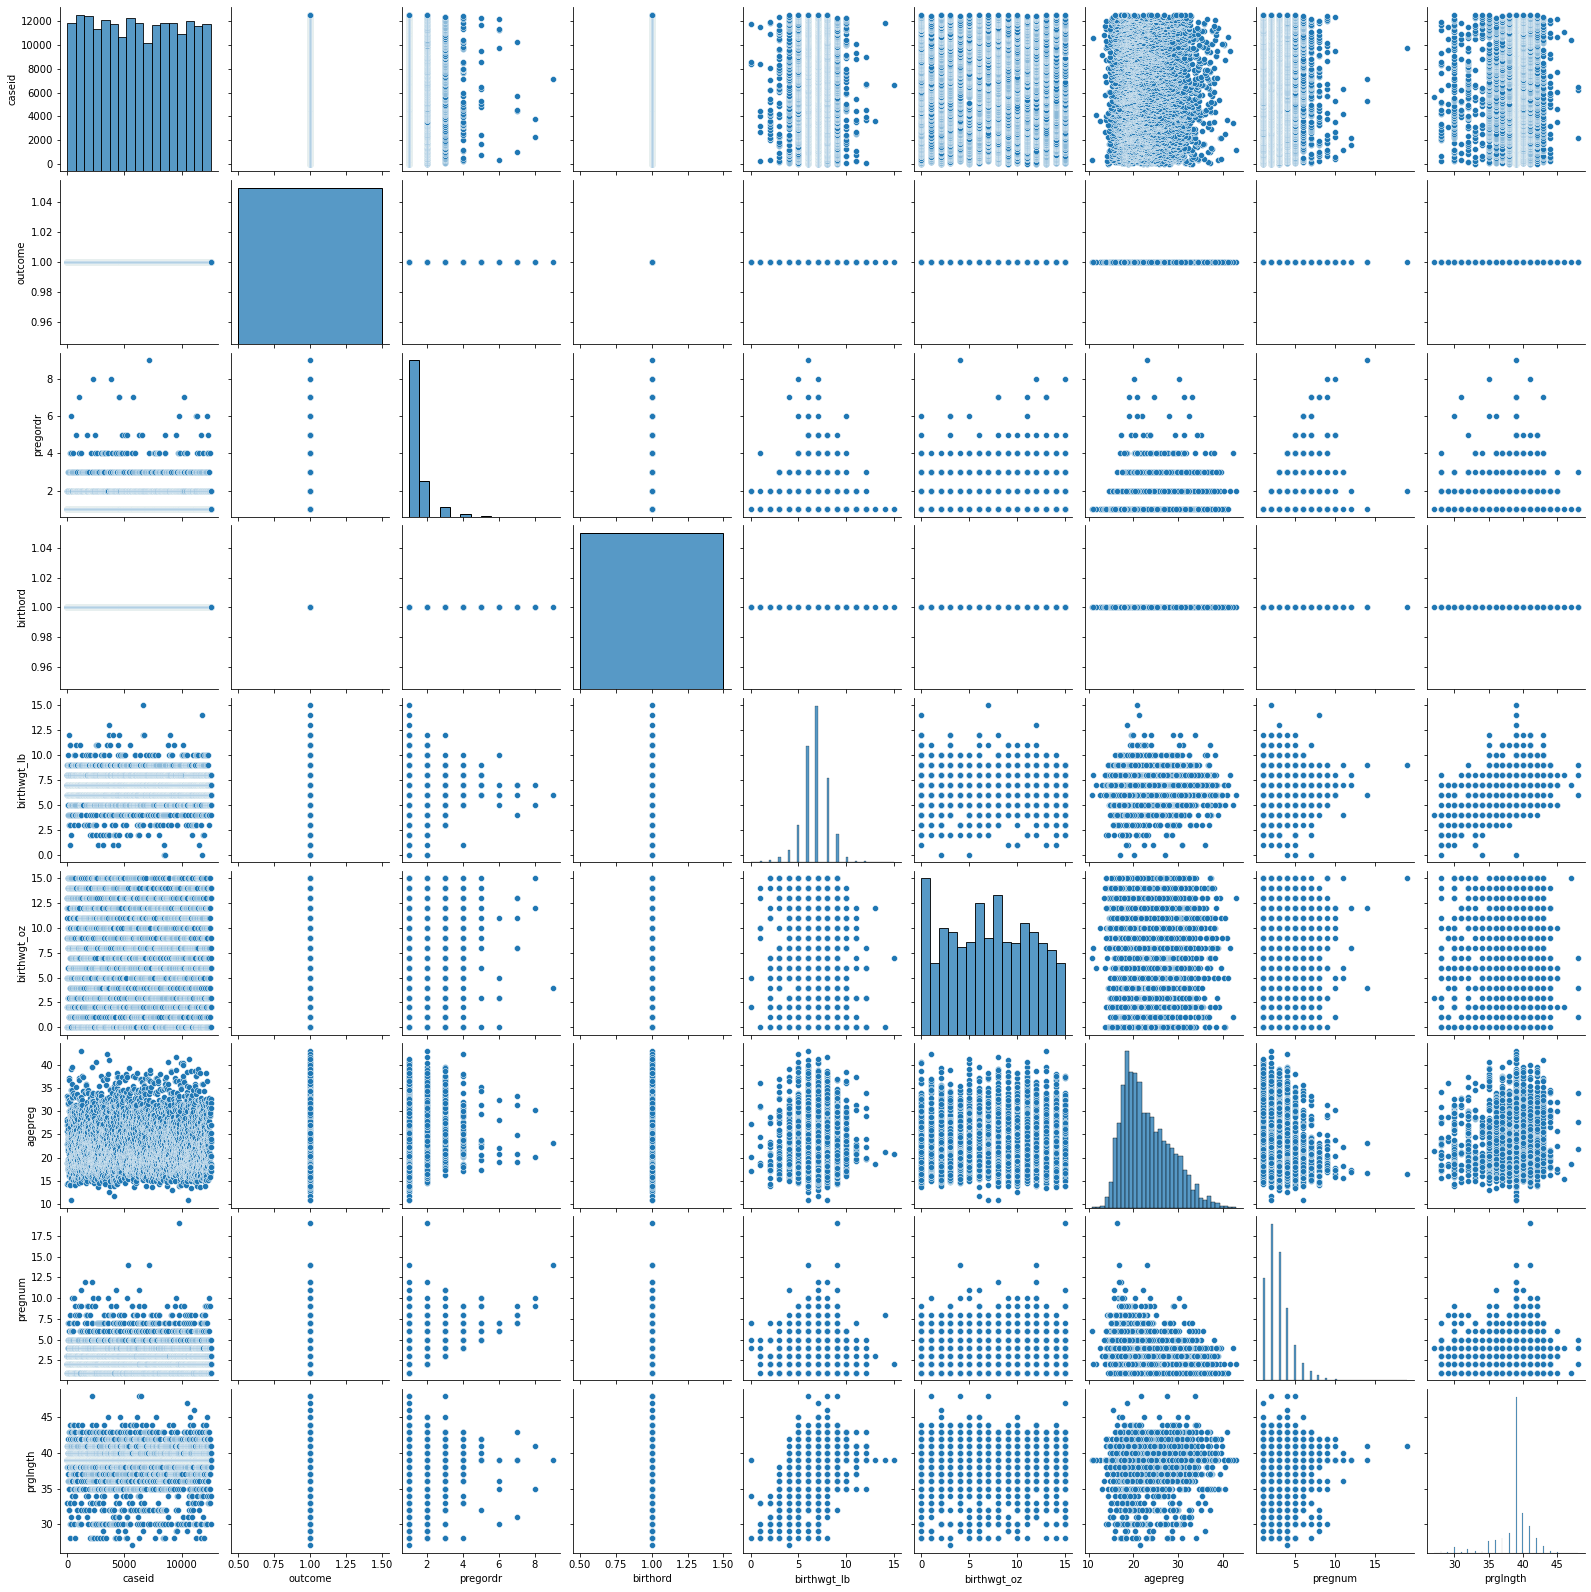

In [632]:
sns.pairplot(firsts)